# Analysis of the Relationship Between the Real and the Dollar

This project aims to utilize the FRED API (Source: https://fred.stlouisfed.org/) to examine the relationship between historical events and the exchange rate differential between the Brazilian currency (Real) and the U.S. dollar.

To proceed, an API key is required to access the FRED API. This requires creating an account on the website and generating a key. The API key is a unique code that identifies the user and enables access to the API. This is a common practice, as many APIs are subscription-based and require a key for consumption. In this case, however, the FRED API is freely available, and the key is automatically generated upon account creation.

>  "This product uses the FRED® API but is not endorsed or certified by the Federal Reserve Bank of St. Louis."

The analysis period spans from 1995, when the Real was introduced as the official currency, to the date on which the API query was performed.

Importing all the necessary packages for the project and loading the API key to perform the request.

In [1]:
from dotenv import load_dotenv

import matplotlib.pyplot as plt
import os
import pandas as pd
import requests

from matplotlib.dates import YearLocator

load_dotenv()

key = os.getenv("API_FRED")

Verifying the response status. Link for an article about HTTP response status code: 
https://developer.mozilla.org/en-US/docs/Web/HTTP/Status

In [2]:
URL_SEARCH_BRAZIL = f"https://api.stlouisfed.org/fred/series/search?search_text=brazil&api_key={key}&file_type=json"

answer_br_search = requests.get(URL_SEARCH_BRAZIL)

answer_br_search.status_code

200

With the GET response indicating a successful result, the created variable is converted into a DataFrame. The .json() method is used to retrieve the content of the request, and ["series"] is applied to access the dictionary key containing the search data.

In [3]:
df_search = pd.DataFrame(answer_br_search.json()["seriess"])

df_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
0,CPALTT01BRM659N,2025-03-10,2025-03-10,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1980-12-01,2025-01-01,Monthly,M,Growth rate same period previous year,Growth rate same period previous Yr.,Not Seasonally Adjusted,NSA,2025-02-17 14:07:34-06,39,49,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...
1,BRACPIALLMINMEI,2025-03-10,2025-03-10,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1979-12-01,2025-01-01,Monthly,M,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-02-17 14:07:50-06,22,49,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...
2,BRACPIALLAINMEI,2025-03-10,2025-03-10,"Consumer Price Indices (CPIs, HICPs), COICOP 1...",1980-01-01,2024-01-01,Annual,A,Index 2015=100,Index 2015=100,Not Seasonally Adjusted,NSA,2025-01-15 14:00:05-06,13,49,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...
3,BRACPALTT01IXNBM,2025-03-10,2025-03-10,Consumer Price Index: All Items: Total for Brazil,1979-12-01,2023-11-01,Monthly,M,Index source base,Index source base,Not Seasonally Adjusted,NSA,2024-01-12 14:27:11-06,8,49,OECD Descriptor ID: CPALTT01\nOECD unit ID: ID...
4,NGDPRSAXDCBRQ,2025-03-10,2025-03-10,Real Gross Domestic Product for Brazil,1996-01-01,2024-07-01,Quarterly,Q,Millions of Domestic Currency,Mil. of Domestic Currency,Seasonally Adjusted,SA,2025-02-03 08:48:02-06,46,47,NaN


Examining the data types and the condition of the returned columns.

In [4]:
df_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         1000 non-null   object
 1   realtime_start             1000 non-null   object
 2   realtime_end               1000 non-null   object
 3   title                      1000 non-null   object
 4   observation_start          1000 non-null   object
 5   observation_end            1000 non-null   object
 6   frequency                  1000 non-null   object
 7   frequency_short            1000 non-null   object
 8   units                      1000 non-null   object
 9   units_short                1000 non-null   object
 10  seasonal_adjustment        1000 non-null   object
 11  seasonal_adjustment_short  1000 non-null   object
 12  last_updated               1000 non-null   object
 13  popularity                 1000 non-null   int64 
 14  group_pop

The focus of the analysis is the difference between the value of the Real and the Dollar; therefore, treating the data in this manner is not yet relevant. By searching for "dollar" in the title, records related to the exchange rate difference are identified.

In [5]:
df_search[df_search["title"].str.contains("dollar", case=False)]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,group_popularity,notes
14,DEXBZUS,2025-03-10,2025-03-10,Brazilian Reals to U.S. Dollar Spot Exchange Rate,1995-01-02,2025-03-07,Daily,D,Brazilian Reals to One U.S. Dollar,Brazilian Reals to 1 U.S. $,Not Seasonally Adjusted,NSA,2025-03-10 15:18:39-05,48,53,Noon buying rates in New York City for cable t...
15,EXBZUS,2025-03-10,2025-03-10,Brazilian Reals to U.S. Dollar Spot Exchange Rate,1995-01-01,2025-02-01,Monthly,M,Brazilian Reals to One U.S. Dollar,Brazilian Reals to 1 U.S. $,Not Seasonally Adjusted,NSA,2025-03-03 15:19:38-06,36,53,Averages of daily figures. Noon buying rates i...
17,AEXBZUS,2025-03-10,2025-03-10,Brazilian Reals to U.S. Dollar Spot Exchange Rate,1995-01-01,2024-01-01,Annual,A,Brazilian Reals to One U.S. Dollar,Brazilian Reals to 1 U.S. $,Not Seasonally Adjusted,NSA,2025-01-03 13:42:38-06,11,53,Averages of daily figures. Noon buying rates i...
117,CCUSMA02BRM618N,2025-03-10,2025-03-10,Currency Conversions: US Dollar Exchange Rate:...,1957-01-01,2025-01-01,Monthly,M,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2025-02-17 14:17:36-06,9,10,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...
122,CCUSMA02BRQ618N,2025-03-10,2025-03-10,Currency Conversions: US Dollar Exchange Rate:...,1957-01-01,2024-10-01,Quarterly,Q,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2025-02-17 14:03:05-06,3,10,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...
133,CCUSMA02BRA618N,2025-03-10,2025-03-10,Currency Conversions: US Dollar Exchange Rate:...,1957-01-01,2024-01-01,Annual,A,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2025-02-17 14:18:03-06,1,10,OECD Data Filters: \nREF_AREA: BRA\nMEASURE: C...
172,CCUSSP02BRM650N,2025-03-10,2025-03-10,Currency Conversions: US Dollar Exchange Rate:...,1964-01-01,2023-12-01,Monthly,M,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2024-01-12 14:27:17-06,5,7,OECD Descriptor ID: CCUSSP02\nOECD unit ID: BR...
178,CCUSSP02BRQ650N,2025-03-10,2025-03-10,Currency Conversions: US Dollar Exchange Rate:...,1964-01-01,2023-10-01,Quarterly,Q,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2024-01-12 14:20:18-06,2,7,OECD Descriptor ID: CCUSSP02\nOECD unit ID: BR...
186,CCUSSP02BRA650N,2025-03-10,2025-03-10,Currency Conversions: US Dollar Exchange Rate:...,1964-01-01,2023-01-01,Annual,A,Brazilian Real,Brazilian Real,Not Seasonally Adjusted,NSA,2024-01-12 14:37:13-06,1,7,OECD Descriptor ID: CCUSSP02\nOECD unit ID: BR...
273,FXRATEBRA618NUPN,2025-03-10,2025-03-10,Exchange Rate to U.S. Dollar for Brazil,1950-01-01,2010-01-01,Annual,A,National Currency Units per US Dollar,National Currency Units per US $,Not Seasonally Adjusted,NSA,2012-09-17 12:02:54-05,4,4,For more information and proper citation see h...


The purpose of this query is to obtain daily values; therefore, a new request is made specifying the series ID with the code "DEXBZUS".

In [6]:
SERIE_DOLLAR = "DEXBZUS"

URL_SERIE_DOLLAR = f"https://api.stlouisfed.org/fred/series/observations?series_id={SERIE_DOLLAR}&api_key={key}&file_type=json"

answer_dollar = requests.get(URL_SERIE_DOLLAR)

answer_dollar.status_code

200

In [7]:
answer_dollar.json()

{'realtime_start': '2025-03-10',
 'realtime_end': '2025-03-10',
 'observation_start': '1600-01-01',
 'observation_end': '9999-12-31',
 'units': 'lin',
 'output_type': 1,
 'file_type': 'json',
 'order_by': 'observation_date',
 'sort_order': 'asc',
 'count': 7875,
 'offset': 0,
 'limit': 100000,
 'observations': [{'realtime_start': '2025-03-10',
   'realtime_end': '2025-03-10',
   'date': '1995-01-02',
   'value': '0.8440'},
  {'realtime_start': '2025-03-10',
   'realtime_end': '2025-03-10',
   'date': '1995-01-03',
   'value': '0.8450'},
  {'realtime_start': '2025-03-10',
   'realtime_end': '2025-03-10',
   'date': '1995-01-04',
   'value': '0.8450'},
  {'realtime_start': '2025-03-10',
   'realtime_end': '2025-03-10',
   'date': '1995-01-05',
   'value': '0.8430'},
  {'realtime_start': '2025-03-10',
   'realtime_end': '2025-03-10',
   'date': '1995-01-06',
   'value': '0.8400'},
  {'realtime_start': '2025-03-10',
   'realtime_end': '2025-03-10',
   'date': '1995-01-09',
   'value': '0.8

A DataFrame is now created using the "observations" key, as it contains the search results with the values.

In [8]:
df_dollar = pd.DataFrame(answer_dollar.json()["observations"])

df_dollar.head()

,realtime_start,realtime_end,date,value
0,2025-03-10,2025-03-10,1995-01-02,0.8440
1,2025-03-10,2025-03-10,1995-01-03,0.8450
2,2025-03-10,2025-03-10,1995-01-04,0.8450
3,2025-03-10,2025-03-10,1995-01-05,0.8430
4,2025-03-10,2025-03-10,1995-01-06,0.8400


In [9]:
df_dollar.tail()

,realtime_start,realtime_end,date,value
7870,2025-03-10,2025-03-10,2025-03-03,5.8852
7871,2025-03-10,2025-03-10,2025-03-04,5.8872
7872,2025-03-10,2025-03-10,2025-03-05,5.8077
7873,2025-03-10,2025-03-10,2025-03-06,5.7785
7874,2025-03-10,2025-03-10,2025-03-07,5.7872


In [10]:
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   realtime_start  7875 non-null   object
 1   realtime_end    7875 non-null   object
 2   date            7875 non-null   object
 3   value           7875 non-null   object
dtypes: object(4)
memory usage: 246.2+ KB


The columns "realtime_start" and "realtime_end" are removed, as they are irrelevant to the analysis.

The data type of the "date" column is corrected from object to datetime.

In [11]:
df_dollar = df_dollar.drop(columns=["realtime_start", "realtime_end"])

df_dollar["date"] = pd.to_datetime(df_dollar["date"])

df_dollar.head()

,date,value
0,1995-01-02,0.8440
1,1995-01-03,0.8450
2,1995-01-04,0.8450
3,1995-01-05,0.8430
4,1995-01-06,0.8400


In [12]:
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7875 non-null   datetime64[ns]
 1   value   7875 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 123.2+ KB


The data type of the "value" column is converted to float.

In [13]:
#df_dollar["value"].astype(float)

The result will generate an error indicating that the string "." cannot be converted to float. By using value_counts(), the frequency of this value in the table can be observed.

In [14]:
df_dollar["value"].value_counts()

value
.         306
1.8050     14
1.7700      8
1.8000      8
2.9450      7
         ... 
5.8852      1
5.8872      1
5.8077      1
5.7785      1
5.7099      1
Name: count, Length: 5916, dtype: int64

There are likely numerous missing values due to the period during FHC's administration when the government controlled the dollar through buying and selling. The "." will be replaced with "NaN," which Pandas recognizes as an absence of data.

In [15]:
df_dollar["value"] = df_dollar["value"].replace(".", float("NaN"))

After the replacement, the object data type can be converted to float.

In [16]:
df_dollar["value"] = df_dollar["value"].astype(float)

In [17]:
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7875 non-null   datetime64[ns]
 1   value   7569 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 123.2 KB


To facilitate data construction, we will set the "date" column as the index.

In [18]:
df_dollar = df_dollar.set_index("date")

df_dollar.head()

,value
date,
1995-01-02,0.844
1995-01-03,0.845
1995-01-04,0.845
1995-01-05,0.843
1995-01-06,0.840


In [19]:
df_dollar.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7875 entries, 1995-01-02 to 2025-03-07
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   7569 non-null   float64
dtypes: float64(1)
memory usage: 123.0 KB


Recreating the chart found on the API's website.

<Axes: xlabel='date'>

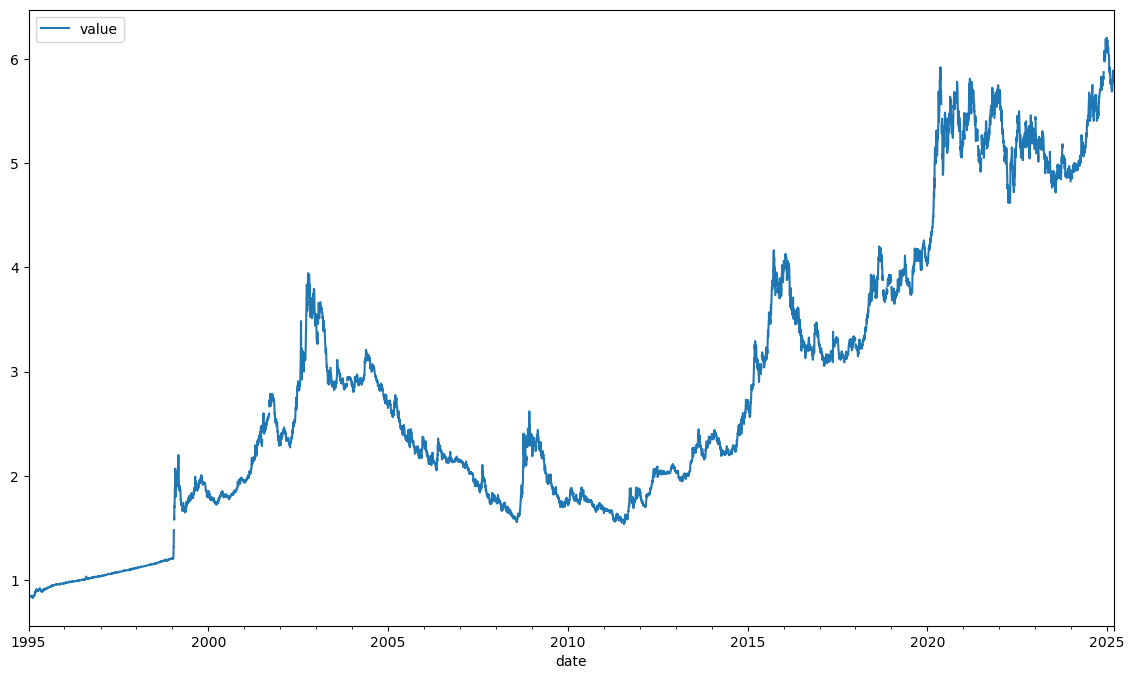

In [20]:
df_dollar.plot(figsize=(14, 8))

It is possible to see some null values at the beginning of the chart, and they would have been replaced by "." in the table.

Improving the chart presentation with Matplotlib.

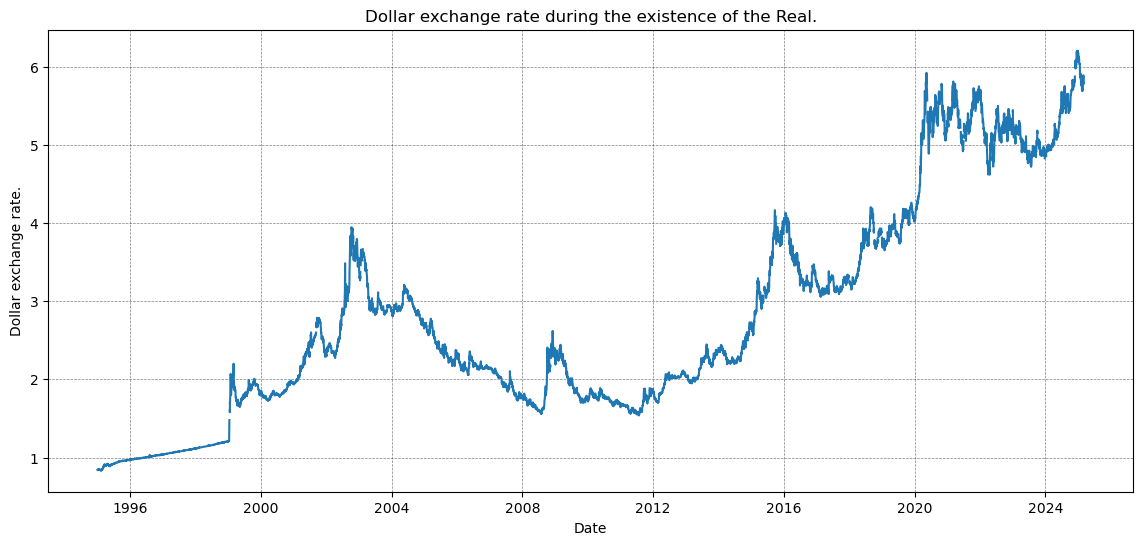

In [21]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df_dollar.index, df_dollar["value"])

ax.set_title("Dollar exchange rate during the existence of the Real.")
ax.set_ylabel("Dollar exchange rate.")
ax.set_xlabel("Date")

ax.grid(linestyle="--", linewidth=0.5, color="black", alpha=0.5)

plt.show()

Checking the last date with a recorded dollar exchange rate.

In [22]:
last_date = df_dollar.index[-1]
last_date

Timestamp('2025-03-07 00:00:00')

Creating a dictionary to separate the term period of each president of Brasil.

In [23]:
presidents = {
    "FHC": ("1995-01-01", "2002-12-31"),
    "Lula 1": ("2003-01-01", "2010-12-31"),
    "Dilma": ("2011-01-01", "2016-08-31"),
    "Temer": ("2016-09-01", "2018-12-31"),
    "Bolsonaro": ("2019-01-01", "2022-12-31"),
    "Lula 2": ("2023-01-01", "2025-03-07"),
}

Using the dictionary along with Matplotlib to visually highlight on the chart the term period of each president in office and the dollar exchange rate during their administrations.

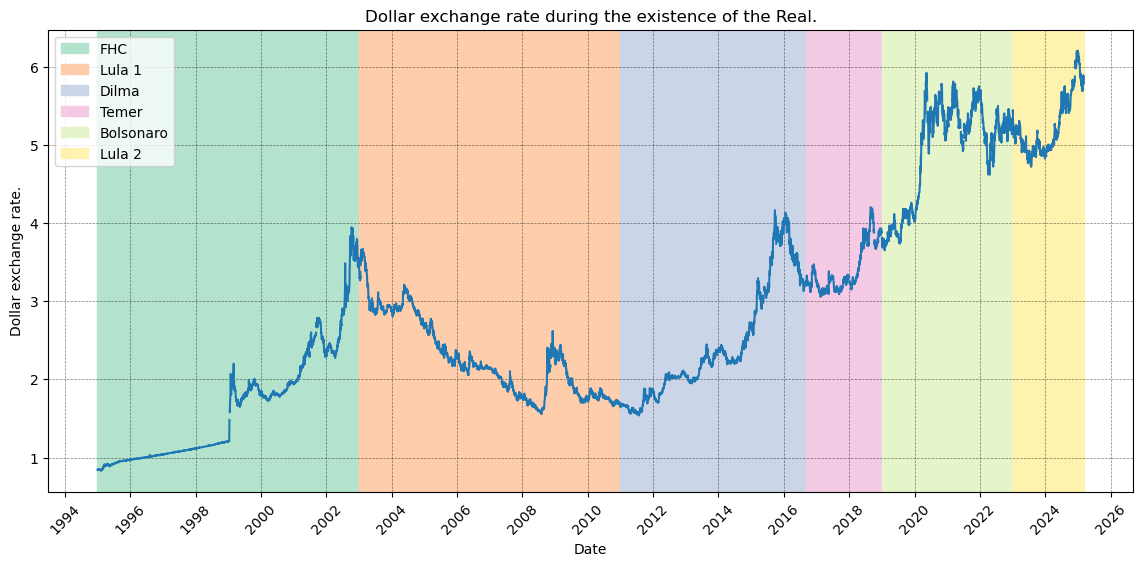

In [24]:
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df_dollar.index, df_dollar["value"])

ax.set_title("Dollar exchange rate during the existence of the Real.")
ax.set_ylabel("Dollar exchange rate.")
ax.set_xlabel("Date")

ax.grid(linestyle="--", linewidth=0.5, color="black", alpha=0.5)

colors = plt.cm.Pastel2.colors

for president, period, color in zip(presidents.keys(), presidents.values(), colors):
    ax.axvspan(period[0], period[1], color=color, label=president)

ax.xaxis.set_major_locator(YearLocator(2))
ax.xaxis.set_tick_params(rotation=45)

ax.legend()

plt.show()

Creating separate charts for the dollar exchange rate during each presidential term.

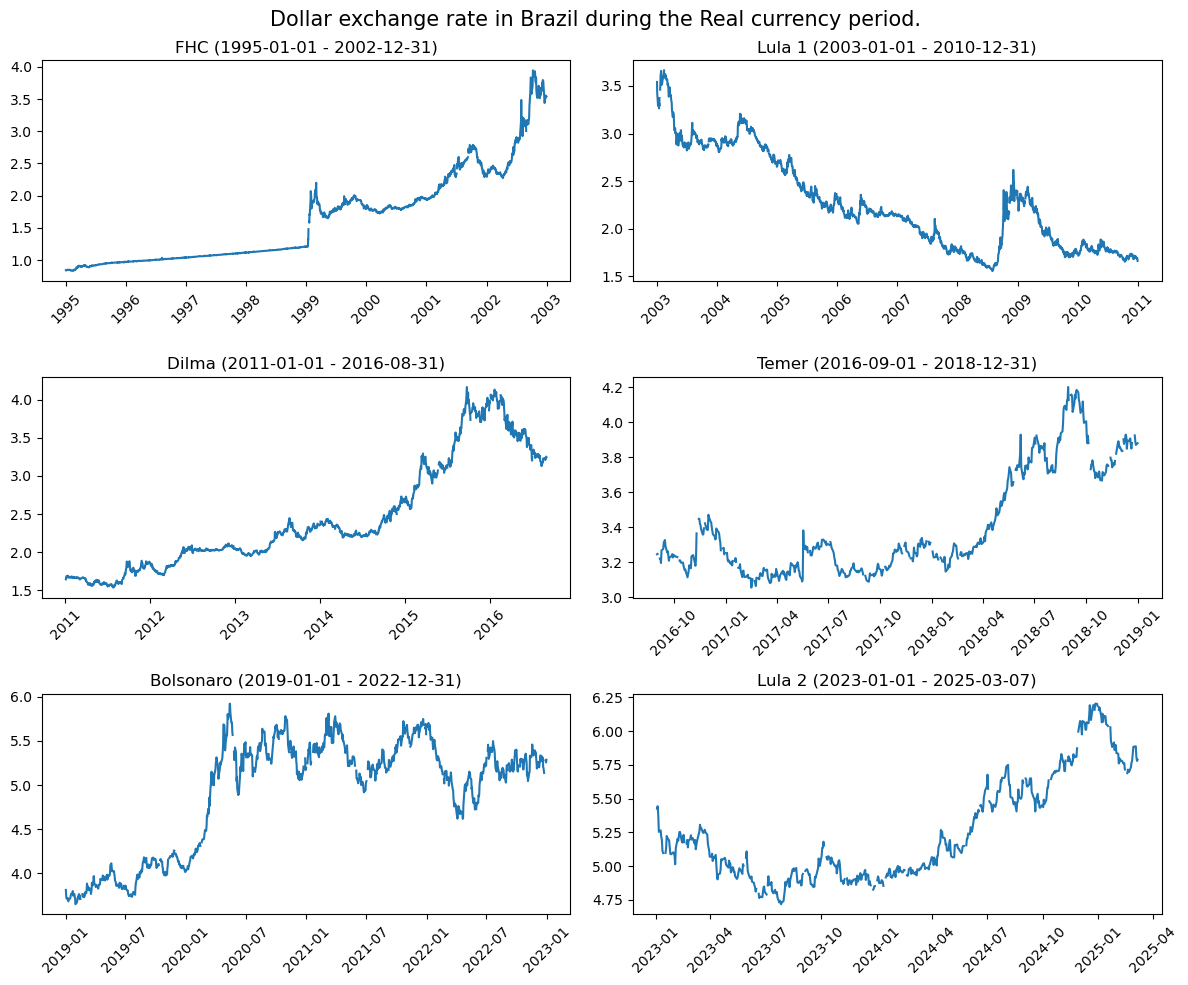

In [25]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 10), tight_layout=True)

for president, period, ax in zip(presidents.keys(), presidents.values(), axs.flatten()):
    df_temp = df_dollar.loc[presidents[president][0]:presidents[president][1]]
    ax.plot(df_temp.index, df_temp["value"])
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_title(f"{president} ({period[0]} - {period[1]})")

fig.suptitle("Dollar exchange rate in Brazil during the Real currency period.", fontsize=15)

plt.show()

### Context:

FHC took office right after the Real Plan (1994), which stabilized the economy and controlled hyperinflation. Initially, the exchange rate was semi-fixed, with the Real pegged to the dollar. The Real started strong in July 1994, gradually appreciating until 1998. On January 13, 1999, the Central Bank announced a floating exchange rate after exhausting its reserves trying to defend the Real against crises, coupled with political uncertainty at the time, causing the dollar to surge. The 9/11 attacks increased global risk aversion, and the uncertainty surrounding Lula's (PT) potential victory, seen as "risky" by the market, caused the dollar to skyrocket in 2002.

Lula maintained the macroeconomic tripod (floating exchange rate, inflation targets, fiscal surplus), reassuring investors, and the global rise in commodity prices (soybeans, iron ore) boosted Brazilian exports, strengthening the Real. The Lehman Brothers collapse in September 2008 caused global panic, but Brazil fared well, with robust reserves and capital inflows.

Dilma's administration saw the slowdown of China, which reduced demand for commodities, weakening the Real. Subsidies, price controls (on fuels), and fiscal expansion generated mistrust. After her re-election, the revelation of "pedaladas fiscais" and the deterioration of public accounts caused the dollar to rise during her second term. Political instability culminated in her impeachment in August 2016.

Temer assumed office promising fiscal adjustments but faced political crises. The approval of the spending cap (2016) reduced the dollar, but recordings involving Temer undermined confidence, and the dollar rose afterward. The 2018 election and uncertainty regarding the future government (Bolsonaro) kept the dollar volatile.

The approval of the Pension Reform in October 2019 during Bolsonaro's government led to a decrease in the dollar, but the Real's appreciation was limited by global uncertainties. The dollar reached its highest peak in 2020 due to the global economic collapse and emergency spending in Brazil caused by the COVID-19 pandemic. The rise in commodities temporarily strengthened the Real, but electoral uncertainties raised the dollar again by October.

Lula II (third term) approved the PEC of Transition and increased spending, which weakened the Real, keeping the dollar above R$5.00. A decrease in U.S. interest rates and fiscal framework (2023) caused the dollar to fall, but fiscal uncertainties limited the Real's appreciation. Trump's protectionist policies strengthened the dollar globally, and the Selic rate rose to 12.25% in December 2024 to curb inflation (4.87% over 12 months until November 2024), but the perception of fiscal risk keeps the dollar high. Currently, the government is trying to deal with inflation and the rise of the dollar over the Real's value.